# Initial Exploratory Data Analysis (EDA)

## Scenario
With the first batch of data cleaned, your mission is now to conduct an initial Exploratory Data Analysis (EDA). You must develop a reusable, "data-aware" analysis function that can generate a standard set of plots for any given dataset. Your goal is to use this function to uncover initial patterns in the data and form a preliminary hypothesis about the UAV's location.

## Coding Task Overview
- **Import** your `clean_data` function and load the cleaned dataset from Part 2.
- **Develop** a new, powerful `perform_eda` function that intelligently checks the data type of each column and generates the appropriate visualization (e.g., histograms for numbers, countplots for categories).
- **Apply** this function to the data and write up your findings in an "Initial Intelligence Report."

## Mission Deliverable
A markdown cell summarizing your initial findings, supported by key plots. This report must include a map that visually identifies a preliminary, high-priority search area based on the strongest signal readings.

In [1]:
# Import pandas, numpy, matplotlib.pyplot, seaborn, folium, and plotly.graph_objects
import pandas as pd
import numpy as np  
import os
# From our utility file, import the clean_data function
from uav_analysis_tools import clean_data




### STEP 1: Load the Cleaned Data

In this part remember that the necessary data files are stored in the ```data``` subdierctory so you will need the ```os``` 
package's ```os.path.join()``` function to create the proper load location for pandas' CSV reading functions

Load the ```cleaned_reports_batch_1.csv``` file into the ```df_clean``` dataframe using pandas ```read_csv()``` function on the correct filepath

In [2]:
DATA_DIR = None #placeholder for the data directory
datafilepath = None #placeholder for the data file path

df_clean = None #placeholder for the cleaned dataframe

##########################################################
##### START STUDENT CODE HERE:

#Set the DATA_DIR variable to 'data'
DATA_DIR = 'data'

#create the datafilepath variable by joining DATA_DIR and 'cleaned_reports_batch_1.csv' using os.path.join()
datafilepath = os.path.join(DATA_DIR, 'cleaned_reports_batch_1.csv')

# Load the csv file into a DataFrame called df_clean using pd.read_csv()
df_clean = pd.read_csv(datafilepath)


##### END STUDENT CODE HERE
##########################################################



# Display the first few rows with .head() to confirm it loaded correctly.
df_clean.head()


,report_id,timestamp,team_callsign,latitude,longitude,elevation_m,wind_direction_deg,ambient_temp_c,battery_level_percent,signal_strength
0,1,2025-08-21 06:00:00,team001,37.358199,-119.057599,2182.644531,219.561808,18.985750,29.388601,-120.000000
1,2,2025-08-21 06:10:00,bravo,37.114237,-119.297087,1759.496216,119.164591,27.642957,33.244226,-120.000000
2,3,2025-08-21 06:20:00,team003,37.442638,-118.899662,3000.708740,80.086260,23.322653,68.630174,-120.000000
3,4,2025-08-21 06:30:00,team004,37.253483,-118.863832,3092.101807,65.357817,17.978901,46.828729,-120.000000
4,5,2025-08-21 06:40:00,team005,37.460772,-119.286037,2153.934692,163.637661,27.215710,74.297789,-116.337263


### STEP 2: Generate the Interactive Map of Team Reports

No Student Coding Required

Since the teams conducted operations in a specific geographic area, a first step of Exploratory Data Analysis (EDA) is to map their locations and information from their report.

This step will create a map of the locations of the team reports where each team's received signal strength is shown on a color range from blue (low or no signal received) to yellow (high signal strength).   The report location markers can be clicked on for more info about the report.

The mapping function ```EDA_makeMap``` is present in the ```uav_mapping_tools.py``` python file and is imported before being used here.  The map can be panned and zoomed, and the map type can be selected using the layer GUI icon in the upper right to select between topographic map, street map, or satellite view

Note that some notebooks may experience a "Notebook not trusted" error and not allow the map to be shown.  If this happens, the user can try closing and reopening the notebook or clicking on the button "Not Trusted" in the jupyter web application when displaying the notebook. 

Additionally, some visual glitches may occur such as portions of the map not appearing to load - this is typically due to issues with the user's bandwidth or availability of the map server.  These glitches may become more apparent if the user tries to zoom out or pan the map

Generating new map and caching to: map.html



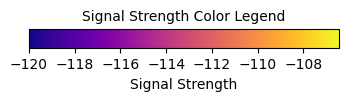

In [3]:
# make the map.  Sometimes the map may not be visible.  Solutions include:
# 1) close and reopen the notebook
# 2) restart the kernel and run all cells again
# 3) Ensure the notebook is trusted (in Jupyter, go to File -> Trust Notebook)
import uav_mapping_tools
m = uav_mapping_tools.EDA_makeMap(df_clean, force_regenerate=True)
display(m)

### STEP 3: Perform the Exploratory Data Analysis (EDA) Visualizations

STUDENT CODE REQUIRED

There are three locations for the student code
1. a barplot of the number of reports which came in during each of the 24 hours of the day
1. a barplot of the number of reports which came in per team
1. a scatterplot of the sorted values of the signal strength of the reports

Once this function is written and working properly, add the ```perform_eda``` function to the ```uav_analysis_tools.py``` file and save the file.

In [4]:
# STEP 3: Perform the Exploratory Data Analysis (EDA) Visualizations
def perform_eda(df, target_column):
    import matplotlib.pyplot as plt
    import seaborn as sns
    # 1. Print the DataFrame's .info() and .describe() summaries.
    print("DataFrame Info:")
    print(df.info())
    print("\nDataFrame Description:")
    print(df.describe(include='all'))

    # 2. Separate the feature columns from the target column.
    features = df.drop(columns=[target_column])
    target = df[target_column]

    # 3. Loop through each feature column and plot the appropriate visualizations.:
    for column in features.columns:
        print("Handling column",column)
        if column == 'timestamp':
            # Special handling for timestamp: plot count by hour of day

            
            features['timestamp'] = pd.to_datetime(features['timestamp'], errors='coerce')
            features['hour'] = features['timestamp'].dt.hour

            hour_counts = features['hour'].value_counts().sort_index()
            hour_count_index = hour_counts.index  #get the index of the hour for the horizontal axis labels
            hour_count_values = hour_counts.values #get the counts of the hours for the vertical axis values

            plt.figure(figsize=(10, 4))

            # now plot the bar chart of how many reports came in for each hour of the day
            # use hour_count_index for the x values and hour_count_values for the y values

            ##########################################################
            ##### START STUDENT CODE HERE:


            sns.barplot(x=hour_count_index, y=hour_count_values)


            ##### END STUDENT CODE HERE
            ##########################################################

            plt.title('Report Counts by Hour of Day')
            plt.xlabel('Hour of Day')
            plt.ylabel('Number of Reports')
            plt.show()

        if column == 'team_callsign':
            # Special handling for team_callsign: plot top N most common callsigns

            top_callsigns = features[column].value_counts().head(10)
            
            top_callsigns_index = top_callsigns.index  #get the index of the hour for the horizontal axis labels
            top_callsigns_values = top_callsigns.values #get the counts of the hours for the vertical axis values



            plt.figure(figsize=(10, 4))
            plt.title('Top 10 Team Callsigns by Report Count')
            plt.xlabel('Team Callsign')
            plt.ylabel('Number of Reports')            
            plt.xticks(rotation=45)            

            # now plot the bar chart of how many reports came in for each of the top 10 team callsigns      
            # use top_callsigns_index for the x values and top_callsigns_values for the y values
            
            ##########################################################
            ##### START STUDENT CODE HERE:

            sns.barplot(x=top_callsigns_index, y=top_callsigns_values)

            ##### END STUDENT CODE HERE
            ##########################################################
            plt.show()

            continue
        if column == 'report_id':
            # Skip histogram and scatterplot for report_id as it's not useful
            continue

        plt.figure(figsize=(12, 5))

        # a. Check the column's data type (dtype).
        if hasattr(features[column], 'dtype') and hasattr(features[column], 'values') and hasattr(features[column], 'name'):
            if hasattr(features[column], 'dtype') and hasattr(features[column].dtype, 'kind') and features[column].dtype.kind in 'ifc':
                # Numeric
                plt.subplot(1, 2, 1)
                sns.histplot(features[column], bins=20, kde=False)
                plt.title(f'Histogram of {column}')

                plt.subplot(1, 2, 2)
                sns.scatterplot(x=features[column], y=target)
                plt.title(f'Scatter plot of {column} vs {target_column}')

            elif hasattr(features[column], 'dtype') and (features[column].dtype.name == 'category' or features[column].dtype == object):
                # Categorical
                plt.subplot(1, 2, 1)
                sns.countplot(y=features[column])
                plt.title(f'Countplot of {column}')

                if hasattr(target, 'dtype') and hasattr(target.dtype, 'kind') and target.dtype.kind in 'ifc':
                    plt.subplot(1, 2, 2)
                    sns.boxplot(x=features[column], y=target)
                    plt.title(f'Box plot of {column} vs {target_column}')

        plt.tight_layout()
        plt.show()

    # 4. After the loop, create a correlation heatmap for all numeric columns in the DataFrame.
    numeric_cols = df.select_dtypes(include=['number'])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap')

    # 5. Sorted scatterplot of signal strength
    if 'signal_strength' in df.columns:
        plt.figure(figsize=(10, 4))
        sorted_signal = df['signal_strength'].sort_values().reset_index(drop=True)

        signal_strength_index = sorted_signal.index  #get the index of the hour for the horizontal axis labels
        signal_strength_values = sorted_signal.values #get the counts of the hours for the vertical axis values

        plt.title('Sorted Scatterplot of Signal Strength')
        plt.xlabel('Sorted Index')
        plt.ylabel('Signal Strength')


        # now plot the scatterplot of the sorted signal strength values using plt.scatter()
        # use signal_strength_index for the x values and signal_strength_values for the y values
        # and set the alpha to 0.7 for better visibility

        ##########################################################
        ##### START STUDENT CODE HERE:

        plt.scatter(signal_strength_index, signal_strength_values, alpha=0.7)

        ##### END STUDENT CODE HERE
        ##########################################################

        plt.show()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   report_id              190 non-null    int64  
 1   timestamp              190 non-null    object 
 2   team_callsign          190 non-null    object 
 3   latitude               190 non-null    float64
 4   longitude              190 non-null    float64
 5   elevation_m            190 non-null    float64
 6   wind_direction_deg     190 non-null    float64
 7   ambient_temp_c         190 non-null    float64
 8   battery_level_percent  190 non-null    float64
 9   signal_strength        190 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.0+ KB
None

DataFrame Description:
         report_id            timestamp team_callsign    latitude   longitude  \
count   190.000000                  190           190  190.000000  190.000000   
u

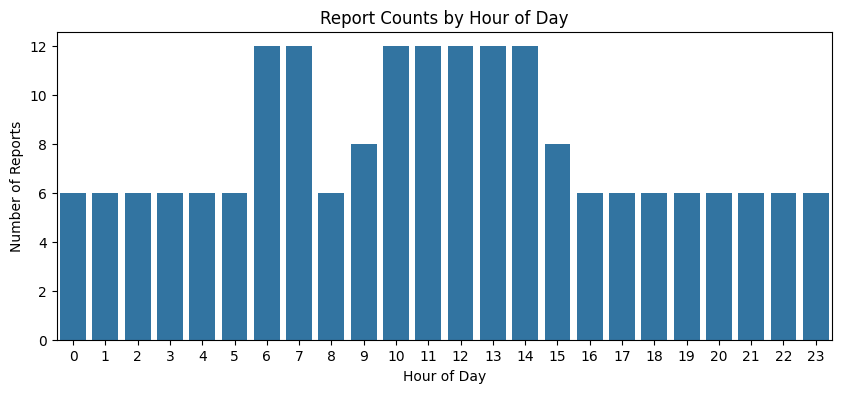

<Figure size 1200x500 with 0 Axes>

Handling column team_callsign


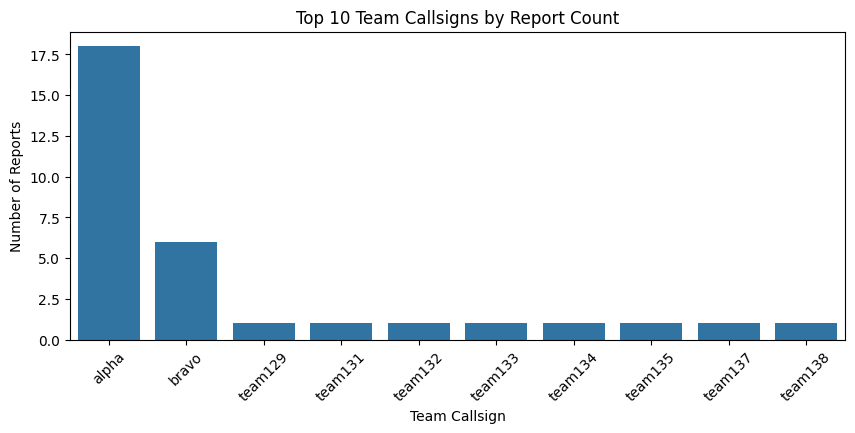

Handling column latitude


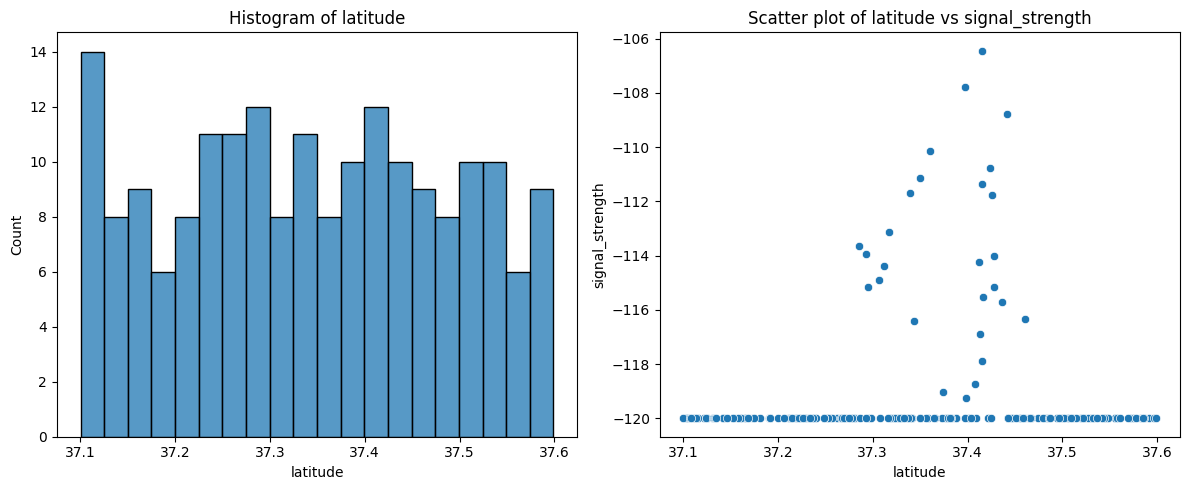

Handling column longitude


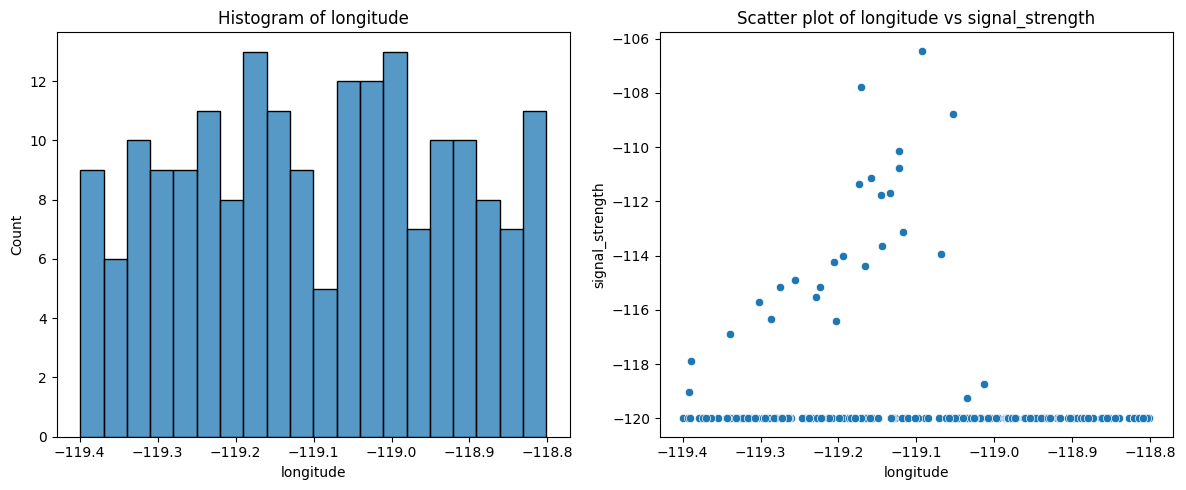

Handling column elevation_m


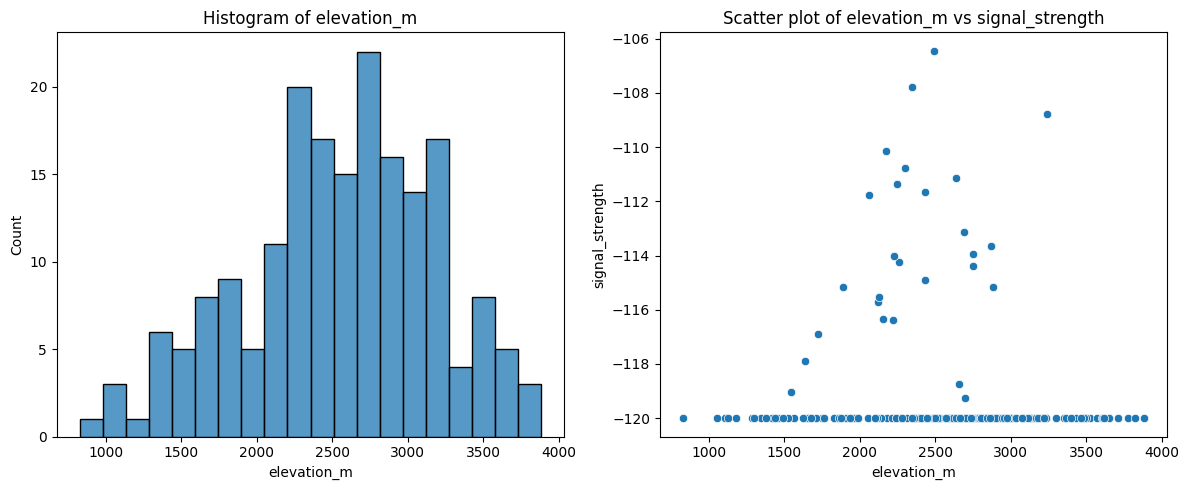

Handling column wind_direction_deg


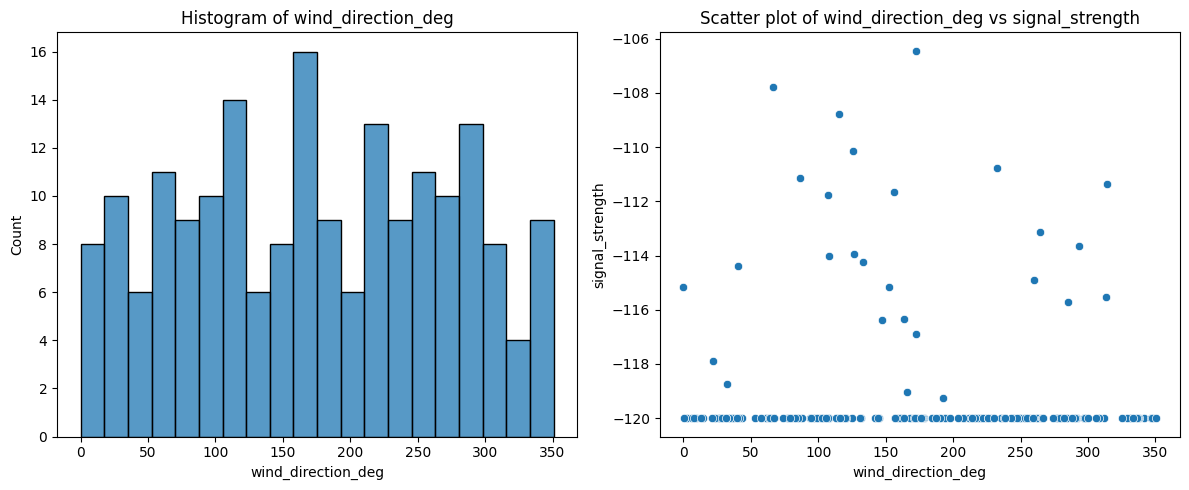

Handling column ambient_temp_c


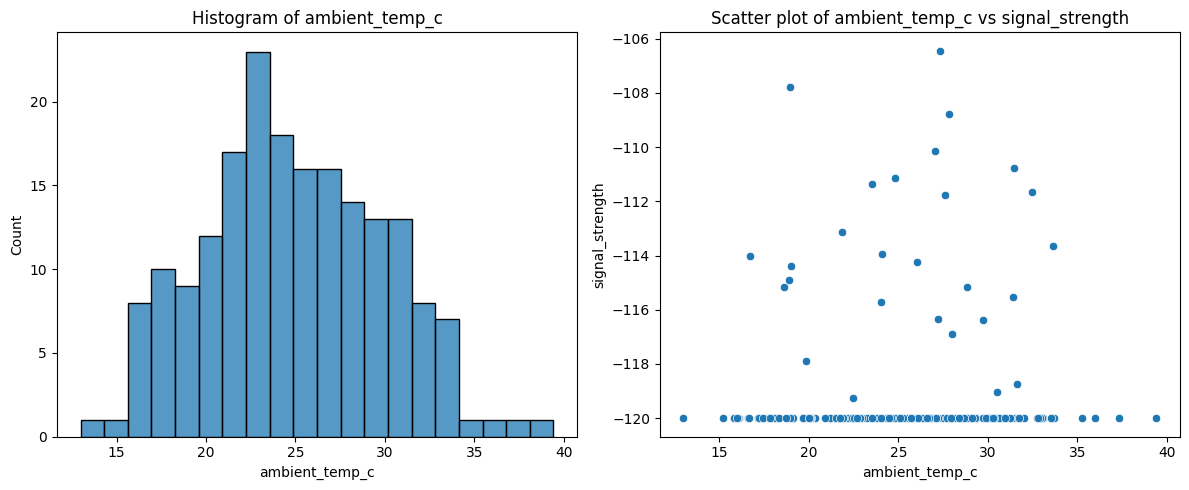

Handling column battery_level_percent


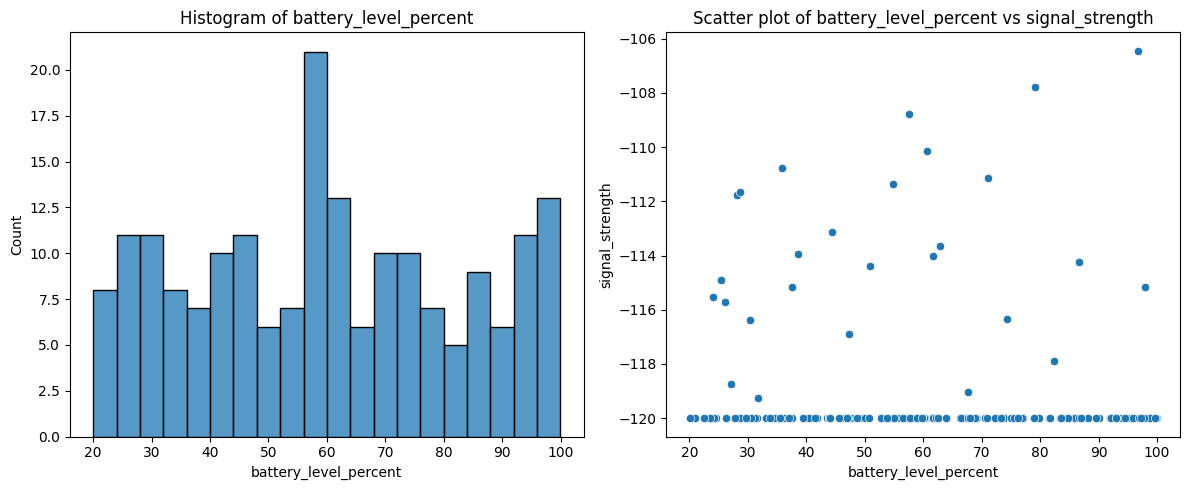

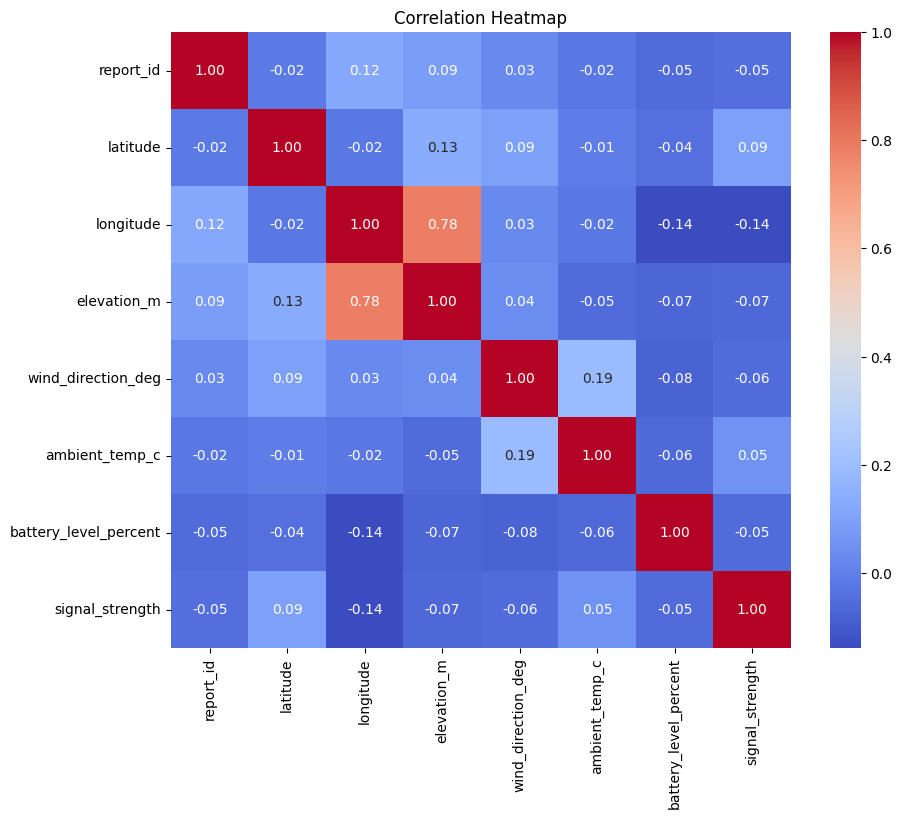

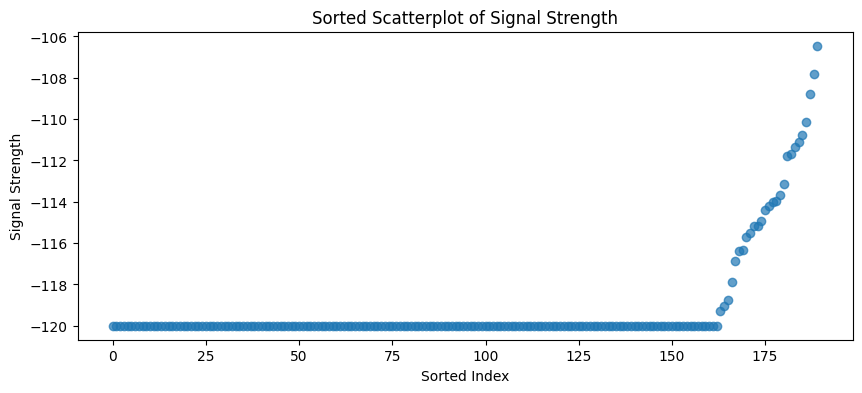

In [5]:
# Apply your new perform_eda function to the df_clean DataFrame.
# The target column is 'signal_strength'.
perform_eda(df_clean, 'signal_strength')